# IMPORTING PACKAGES


In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# IMPORTING DATASET

In [4]:
df = pd.read_csv(r"C:\Users\SARATH PATTI\Desktop\Life Expectancy Data.csv",float_precision='round_trip')
df= round(df)
print('Orginal Dataset:')
print('')
df

Orginal Dataset:



,Country,Year,Status,Lifeexpectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitiB,Measles,...,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.0,71.0,65.0,1154,...,6.0,8.0,65.0,0.0,584.0,33736494.0,17.0,17.0,0.0,10.0
1,Afghanistan,2014,Developing,60.0,271.0,64,0.0,74.0,62.0,492,...,58.0,8.0,62.0,0.0,613.0,327582.0,18.0,18.0,0.0,10.0
2,Afghanistan,2013,Developing,60.0,268.0,66,0.0,73.0,64.0,430,...,62.0,8.0,64.0,0.0,632.0,31731688.0,18.0,18.0,0.0,10.0
3,Afghanistan,2012,Developing,60.0,272.0,69,0.0,78.0,67.0,2787,...,67.0,9.0,67.0,0.0,670.0,3696958.0,18.0,18.0,0.0,10.0
4,Afghanistan,2011,Developing,59.0,275.0,71,0.0,7.0,68.0,3013,...,68.0,8.0,68.0,0.0,64.0,2978599.0,18.0,18.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.0,723.0,27,4.0,0.0,68.0,31,...,67.0,7.0,65.0,34.0,454.0,12777511.0,9.0,9.0,0.0,9.0
2934,Zimbabwe,2003,Developing,44.0,715.0,26,4.0,0.0,7.0,998,...,7.0,7.0,68.0,37.0,453.0,12633897.0,10.0,10.0,0.0,10.0
2935,Zimbabwe,2002,Developing,45.0,73.0,25,4.0,0.0,73.0,304,...,73.0,7.0,71.0,40.0,57.0,125525.0,1.0,1.0,0.0,10.0
2936,Zimbabwe,2001,Developing,45.0,686.0,25,2.0,0.0,76.0,529,...,76.0,6.0,75.0,42.0,549.0,12366165.0,2.0,2.0,0.0,10.0


# DATA PREPROCESSING
### HANDLING MISSING VALUES
##### Now we will find null values in the taken dataset for preprocessing



In [5]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Lifeexpectancy                      10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            194
percentage_expenditure               0
HepatitiB                          553
Measles                              0
BMI                                 34
under_five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV_AIDS                             0
GDP                                448
Population                         652
thinness_1-19_years                 34
thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

#### Now we will clear null values in the taken dataset

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Lifeexpectancy                     0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
HepatitiB                          0
Measles                            0
BMI                                0
under_five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV_AIDS                           0
GDP                                0
Population                         0
thinness_1-19_years                0
thinness_5-9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

### Here we will change the status of the country into number i.e if the country is developing it will displayed as 0 if the country is developed it will displayed as 1 Let’s see the code!!


In [8]:
a = 0
tempStatus = []
for i in df.Status:
    if i == "Developing":
        tempStatus.append(0) 
        a = a+1
    elif i == "Developed":
        tempStatus.append(1)
        a = a+1

df.Status = tempStatus

## FINDING VALUES FOR THE COUNTRY

In [9]:
l=[]
l=df.index[df['Country']=="India"]
l


Int64Index([1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197], dtype='int64')

## Label encoder:
### We know having object values in the dataset complexes the model to predict
### Here in this dataset we have country names 
### So we will turn country in to numbers
### That means first appeared country have value 0 then 1 and so on…..
### For this we use label encoder process
 ### Data formatting brings uniformity in terms of the same type of fonts , shapes ,alignment and font    color.
### For formatting the data here I am using Label Encoder it convert the categorical data into numeric
   ###     “from sklearn.preprocessing import LabelEncoder”
### After formating the data will be like, all the categoricla values are converted into numerical.


In [10]:
#TURN Country into number 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])

In [11]:
print('Dataset after clearning:')
print('')
df

Dataset after clearning:



,Country,Year,Status,Lifeexpectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitiB,Measles,...,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,0,2015,0,65.0,263.0,62,0.0,71.0,65.0,1154,...,6.0,8.0,65.0,0.0,584.0,33736494.0,17.0,17.0,0.0,10.0
1,0,2014,0,60.0,271.0,64,0.0,74.0,62.0,492,...,58.0,8.0,62.0,0.0,613.0,327582.0,18.0,18.0,0.0,10.0
2,0,2013,0,60.0,268.0,66,0.0,73.0,64.0,430,...,62.0,8.0,64.0,0.0,632.0,31731688.0,18.0,18.0,0.0,10.0
3,0,2012,0,60.0,272.0,69,0.0,78.0,67.0,2787,...,67.0,9.0,67.0,0.0,670.0,3696958.0,18.0,18.0,0.0,10.0
4,0,2011,0,59.0,275.0,71,0.0,7.0,68.0,3013,...,68.0,8.0,68.0,0.0,64.0,2978599.0,18.0,18.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,132,2004,0,44.0,723.0,27,4.0,0.0,68.0,31,...,67.0,7.0,65.0,34.0,454.0,12777511.0,9.0,9.0,0.0,9.0
2934,132,2003,0,44.0,715.0,26,4.0,0.0,7.0,998,...,7.0,7.0,68.0,37.0,453.0,12633897.0,10.0,10.0,0.0,10.0
2935,132,2002,0,45.0,73.0,25,4.0,0.0,73.0,304,...,73.0,7.0,71.0,40.0,57.0,125525.0,1.0,1.0,0.0,10.0
2936,132,2001,0,45.0,686.0,25,2.0,0.0,76.0,529,...,76.0,6.0,75.0,42.0,549.0,12366165.0,2.0,2.0,0.0,10.0


In [12]:
min=l[0]
df.loc[min][0]

55.0

# DATA VISUALIZATION:
## Heat map:
### It is the representation of correlation matrix
### Correlation allows us to get a much better understanding of the relationship between variables.
### Here we will see the relation between every variable with other variable.


In [13]:
corr = pd.DataFrame(df.drop('Lifeexpectancy', axis=1)).corr() #axis 1 = columns
corr.style.background_gradient(cmap='coolwarm')

,Country,Year,Status,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitiB,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
Country,1.000000,-0.018344,-0.079464,0.096978,-0.026246,-0.108226,-0.122092,0.013179,-0.035006,-0.022682,-0.020630,0.011280,-0.022621,-0.036725,0.148609,-0.118019,-0.018489,-0.026689,0.004386,-0.016205,-0.050765
Year,-0.018344,1.000000,-0.034138,-0.037092,0.008029,-0.112899,0.069562,0.114897,-0.053822,0.005589,0.010479,-0.016699,0.061894,0.029641,-0.123475,0.096421,0.012567,0.023287,0.012403,0.021958,0.083280
Status,-0.079464,-0.034138,1.000000,-0.278173,-0.108757,0.603650,0.461684,0.140351,-0.071963,0.298155,-0.109847,0.201917,0.184183,0.201654,-0.129347,0.484801,-0.034790,-0.303958,-0.307720,0.228885,0.510937
Adult_Mortality,0.096978,-0.037092,-0.278173,1.000000,0.042450,-0.172450,-0.237605,-0.105225,-0.003967,-0.351086,0.060365,-0.199853,-0.080473,-0.191429,0.552159,-0.255034,-0.015012,0.272172,0.284619,-0.425121,-0.417721
infant_deaths,-0.026246,0.008029,-0.108757,0.042450,1.000000,-0.106805,-0.090760,-0.231769,0.532680,-0.234428,0.996906,-0.156929,-0.148666,-0.161871,0.006401,-0.098093,0.671758,0.463200,0.462339,-0.056825,-0.211643
Alcohol,-0.108226,-0.112899,0.603650,-0.172450,-0.106805,1.000000,0.414026,0.112269,-0.049617,0.353508,-0.101441,0.240872,0.212133,0.244308,-0.024821,0.441285,-0.030891,-0.401871,-0.387176,0.350776,0.610711
percentage_expenditure,-0.122092,0.069562,0.461684,-0.237605,-0.090760,0.414026,1.000000,0.016759,-0.063069,0.242560,-0.092153,0.128624,0.179368,0.134810,-0.095237,0.959300,-0.016786,-0.251035,-0.252789,0.199307,0.423599
HepatitiB,0.013179,0.114897,0.140351,-0.105225,-0.231769,0.112269,0.016759,1.000000,-0.124800,0.143377,-0.240766,0.463331,0.110089,0.588990,-0.095331,0.041850,-0.129723,-0.128217,-0.133512,0.223944,0.212167
Measles,-0.035006,-0.053822,-0.071963,-0.003967,0.532680,-0.049617,-0.063069,-0.124800,1.000000,-0.153435,0.517506,-0.057850,-0.106421,-0.058606,-0.003564,-0.064768,0.321946,0.180785,0.174918,-0.010798,-0.112327
BMI,-0.022682,0.005589,0.298155,-0.351086,-0.234428,0.353508,0.242560,0.143377,-0.153435,1.000000,-0.242127,0.186606,0.183288,0.176463,-0.212926,0.265945,-0.081323,-0.547977,-0.553837,0.461031,0.550287


# MODEL DEVELOPMENT:
### Model development is an iterative process, in which many models are derived, tested and built upon until a model fitting the desired criteria is built. 
### Subsequent modelling work may need to begin the search at the same place as the original model building began, rather than where it finished.
### Here we are separating variables into independent varialbes(input variables) and Dependent variable(Output Variable)
### Here our output variable is “Life expectancy” and all are independent variables


In [14]:
X = df[["Country","Year","Status","Lifeexpectancy","Adult_Mortality"
                       ,"infant_deaths","Alcohol","percentage_expenditure","HepatitiB","Measles"
                       ,"BMI","under_five_deaths","Polio","Total_expenditure","Diphtheria"
                       ,"HIV_AIDS","GDP","Population","thinness_1-19_years","thinness_5-9_years"
                       ,"Income_composition_of_resources","Schooling"]]
y = df.Lifeexpectancy

X_temp = np.array(X).reshape(-1,22)
y_temp = np.array(y).reshape(-1,1)

# SPLITTING INTO TEST TRAIN SET:
### The train-test split is used to estimate the performance of machine learning algorithms that are applicable for prediction-based Algorithms/Applications. This method is a fast and easy procedure to perform such that we can compare our own machine learning model results to machine results. By default, the Test set is split into 30 % of actual data and the training set is split into 70% of the actual data.

### We need to split a dataset into train and test sets to evaluate how well our machine learning model performs. The train set is used to fit the model, and the statistics of the train set are known. The second set is called the test data set, this set is solely used for predictions.


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.2)

# FEATURE IMPORTANT SCORE:
### Feature important score refers to techniques that calculate a score for all the input features
### for a given model- the scores simply present the importance of each feature. A high score means that specific feature  will have a larger effect on the model that is being used to predict a certain variable   
### After calculating feature importance score we have to select variables with high feature importance score


Feature importance score:

[0.0368384  0.05275459 0.00855224 0.24421035 0.06099064 0.03674599
 0.03898472 0.04048428 0.03319204 0.03029852 0.04532774 0.03733696
 0.03357877 0.03776578 0.03285878 0.02384895 0.04204584 0.03320934
 0.0364848  0.03753935 0.01283467 0.04411725]


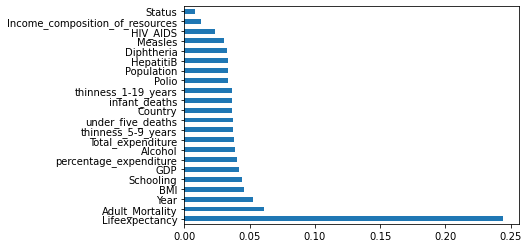

In [16]:
print('Feature importance score:')
print('')

X = df.iloc[:,0:22]         #columns
y = df.iloc[:,3]            #target column

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(22).plot(kind='barh')
plt.show()

In [17]:
print('Feature fitness score:')
print('')

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df.iloc[:,0:22]            #columns
y = df.iloc[:,3]               #target column

bestfeatures = SelectKBest(score_func=chi2, k=22)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#connect both data
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  
print(featureScores.nlargest(22,'Score'))

Feature fitness score:

                            Feature         Score
17                       Population  2.158103e+10
16                              GDP  1.776961e+07
9                           Measles  3.496988e+06
7            percentage_expenditure  3.182847e+06
11                under_five_deaths  8.446130e+04
4                   Adult_Mortality  8.224754e+04
5                     infant_deaths  5.775827e+04
15                         HIV_AIDS  2.268890e+04
10                              BMI  5.747871e+03
0                           Country  2.370820e+03
19               thinness_5-9_years  1.939629e+03
6                           Alcohol  1.884580e+03
18              thinness_1-19_years  1.867492e+03
3                    Lifeexpectancy  1.842903e+03
12                            Polio  1.462188e+03
14                       Diphtheria  1.375944e+03
8                         HepatitiB  1.137094e+03
21                        Schooling  6.593116e+02
2                         

In [18]:
hf_X = df[['Country','Year','Status','Adult_Mortality','infant_deaths','percentage_expenditure','Measles','BMI','under_five_deaths','Total_expenditure','HIV_AIDS','GDP','Income_composition_of_resources','Schooling']]
lf_X = df[["Country","Year","Status","Adult_Mortality"
                       ,"infant_deaths","Alcohol","percentage_expenditure","HepatitiB","Measles"
                       ,"BMI","under_five_deaths","Polio","Total_expenditure","Diphtheria"
                       ,"HIV_AIDS","GDP","Population","thinness_1-19_years","thinness_5-9_years"
                       ,"Income_composition_of_resources","Schooling"]]

yd = df.Lifeexpectancy

# PREDICTION USING MODEL:
## MULTIPLE LINEAR REGRESSION:
### Multiple linear regression (MLR), also known simply as multiple regression, is a statistical technique that uses several explanatory variables to predict the outcome of a response variable. Multiple regression is an extension of linear (OLS) regression that uses just one explanatory variable.


In [19]:
hf_X = np.array(hf_X).reshape(-1,14)
lf_X = np.array(lf_X).reshape(-1,21)
yd = np.array(yd).reshape(-1,1)

In [20]:
X = hf_X
y = yd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
temp_X_train = X_train
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [23]:
print('This is regression accuracy score:')
r2_score(y_pred, y_test)

This is regression accuracy score:


0.8220789854746243

In [24]:
scores = cross_val_score(reg, X_test, y_test, cv=5,scoring= 'r2')
scores

array([0.79607197, 0.83058209, 0.86255366, 0.82257198, 0.77072854])

In [25]:
print("%0.2f r2 accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.82 r2 accuracy with a standard deviation of 0.03


In [26]:
print('Prediction of life expectancy of Afghanistan:')
temp_data = [[0,2015,0,263,62,71.27962,1154,19.1,83,8.16,0.1,584.2592,0.479,10.1]]
scaler.fit(temp_X_train)
temp_data = scaler.transform(temp_data)
abc = reg.predict(temp_data)
print(abc)

Prediction of life expectancy of Afghanistan:
[[64.24561099]]


In [27]:
print('Prediction of life expectancy of Albania:')
temp_data = [[1,2022,0,93,0,913.76221682,0,60,0,8,0.1,18260.8932979,0.9,14.2]]
scaler.fit(temp_X_train)
temp_data = scaler.transform(temp_data)
abc = reg.predict(temp_data)
print(abc)

Prediction of life expectancy of Albania:
[[74.35003943]]


In [48]:
print('Prediction of life expectancy of india:')
temp_data = [[55,2022,0,295,700,14.08905273,798,13.4,122,8.82,0.1,2543.7285436,0.373,14.6]]
scaler.fit(temp_X_train)
abc =reg.predict(temp_data)
temp_data = scaler.transform(temp_data)
abc = reg.predict(temp_data)
print(abc)

Prediction of life expectancy of india:
[70.33548967]


# Support vector regression:
### The SVM regression algorithm is referred to as Support Vector Regression or SVR.
### Support Vector Regression (SVR) is a supervised learning model that can be used to perform both linear and nonlinear regressions. In the previous lessons, we learned that the goal of applying linear regression is to minimize the error between the prediction and data. However, the goal of applying Support Vector Regression to a data set is to make sure that the errors do not exceed the threshold. In SVR, we fit as many instances as possible between the lines while limiting the margin violation.
1. Importing necessary libraries
2. Importing the data set
3. Separating the features and the target variable
4. Feature Scaling
5. Splitting the data into a train set and a test set
6. Fitting the model to the training set


In [29]:
from sklearn.svm import SVR

In [30]:
X = hf_X
y = df.Lifeexpectancy

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
temp_X_train = X_train
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
reg = SVR()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [33]:
r2_score(y_test, y_pred)

0.8508344022983207

In [34]:
scores = cross_val_score(reg, X_test, y_test, cv=5,scoring= 'r2')
scores

array([0.72040975, 0.69551425, 0.7043503 , 0.77296282, 0.6146089 ])

In [35]:
print("%0.2f r2 accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.70 r2 accuracy with a standard deviation of 0.05


In [36]:
print('Prediction of life expectancy Afghanistan:')
temp_data = [[0,2019,0,250,55,90.27962,1154,19.1,83,8.16,0.1,507.2592,0.479,10.1]]
scaler.fit(temp_X_train)
temp_data = scaler.transform(temp_data)
abc = reg.predict(temp_data)
print(abc)

Prediction of life expectancy Afghanistan:
[64.74046129]


In [37]:
print('Prediction of life expectancy:')
temp_data = [[1,2016,1,281,77,56.76221682,2861,16.2,106,9.42,0.1,445.8932979,0.434,8.9]]
scaler.fit(temp_X_train)
temp_data = scaler.transform(temp_data)
abc = reg.predict(temp_data)
print(abc)

Prediction of life expectancy:
[67.34566715]


# NEURAL NETWORK:
## A neural network is a system that learns how to make predictions by following these steps:
### 1.Taking the input data
### 2.Making a prediction
### 3.Comparing the prediction to the desired output
### 4.Adjusting its internal state to predict correctly the next time


In [38]:
import sklearn.neural_network as nn

In [39]:
X = hf_X
y = yd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
temp_X_train = X_train
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
reg = nn.MLPRegressor(hidden_layer_sizes=(1000,1000,5), activation='relu', alpha=0.01, random_state= 20,max_iter=200)

reg.fit(X_train, y_train.ravel())
y_pred = reg.predict(X_test)

yu = y_pred.reshape(-1,1)

C:\Users\SARATH PATTI\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [42]:
r2_score(y_test, yu)

0.9104946964861128

In [43]:
print('Prediction of life expectancy:')
temp_data = [[0,2018,1,263,62,71.27962,1154,19.1,83,8.16,0.1,584.2592,0.479,10.7]]
scaler.fit(temp_X_train)
temp_data = scaler.transform(temp_data)
abc = reg.predict(temp_data)
print(abc)

Prediction of life expectancy:
[64.88764743]


In [44]:
print('Prediction of life expectancy:')
temp_data = [[1,2017,0,74,0,450.76221682,0,58,0,10,0.1,35282.8932979,0.762,11.6]]
scaler.fit(temp_X_train)
temp_data = scaler.transform(temp_data)
abc = reg.predict(temp_data)
print(abc)

Prediction of life expectancy:
[75.88147445]


In [45]:
print('Prediction of life expectancy:')
temp_data = [[55,2015,0,184,800,100.76221682,795,18.1,900,4.69,0.1,2100.8932979,0.8,11.5]]
scaler.fit(temp_X_train)
abc =reg.predict(temp_data)
temp_data = scaler.transform(temp_data)
abc = reg.predict(temp_data)
print(abc)

Prediction of life expectancy:
[68.76823104]
